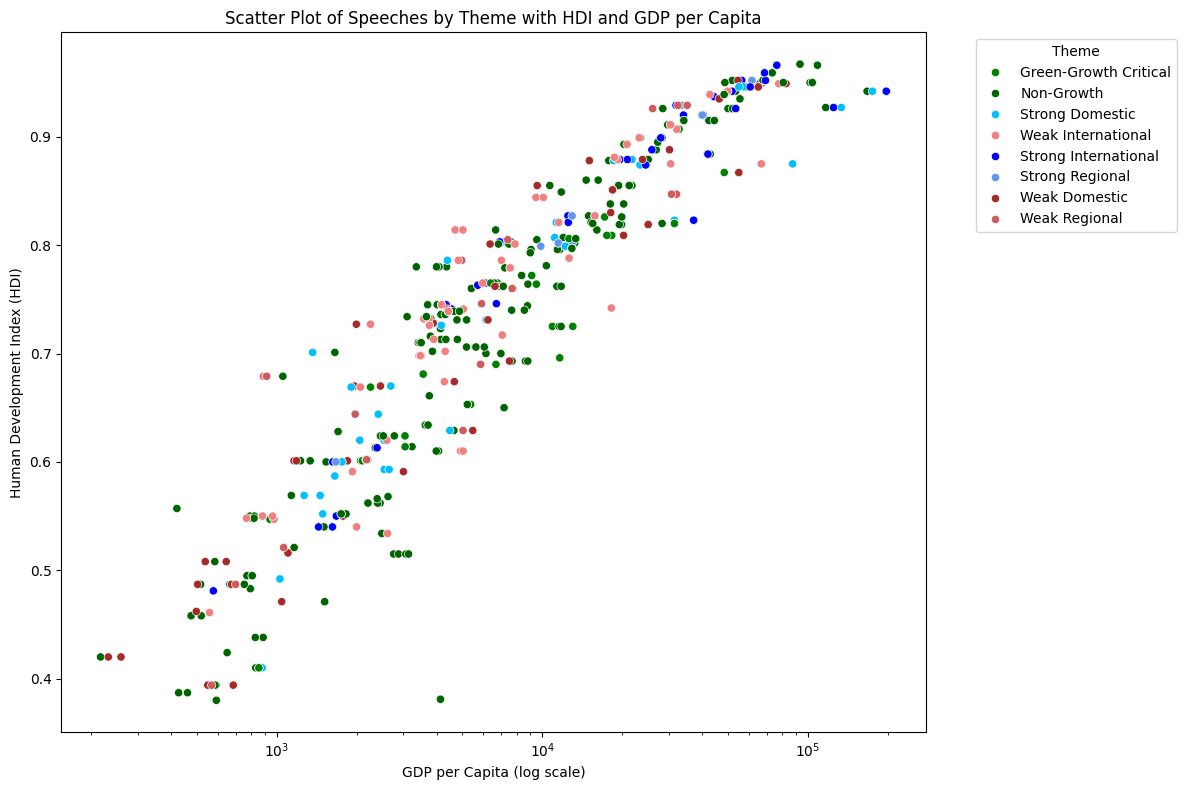

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Split the Theme_Combined column
df['Theme_Combined'] = df['Theme_Combined'].str.split()

# Explode the dataset so each theme has its own row
df_exploded = df.explode('Theme_Combined').reset_index(drop=True)

# Map the themes to their full names and assign similar colors to related themes
theme_mapping = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}

colors = {
    'Strong International': 'blue',
    'Strong Regional': 'cornflowerblue',
    'Strong Domestic': 'deepskyblue',
    'Weak International': 'lightcoral',
    'Weak Regional': 'indianred',
    'Weak Domestic': 'brown',
    'Green-Growth Critical': 'green',
    'Non-Growth': 'darkgreen'
}

df_exploded['Theme_Full'] = df_exploded['Theme_Combined'].map(theme_mapping)
df_exploded['Color'] = df_exploded['Theme_Full'].map(colors)

# Set up the plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_exploded, 
                x='GDP_capita', 
                y='HDI', 
                hue='Theme_Full', 
                palette=colors, 
                legend='full')

# Set the x-axis to a log scale
plt.xscale('log')

# Set plot labels and title
plt.xlabel('GDP per Capita (log scale)')
plt.ylabel('Human Development Index (HDI)')
plt.title('Scatter Plot of Speeches by Theme with HDI and GDP per Capita')

# Adjust the legend
plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()



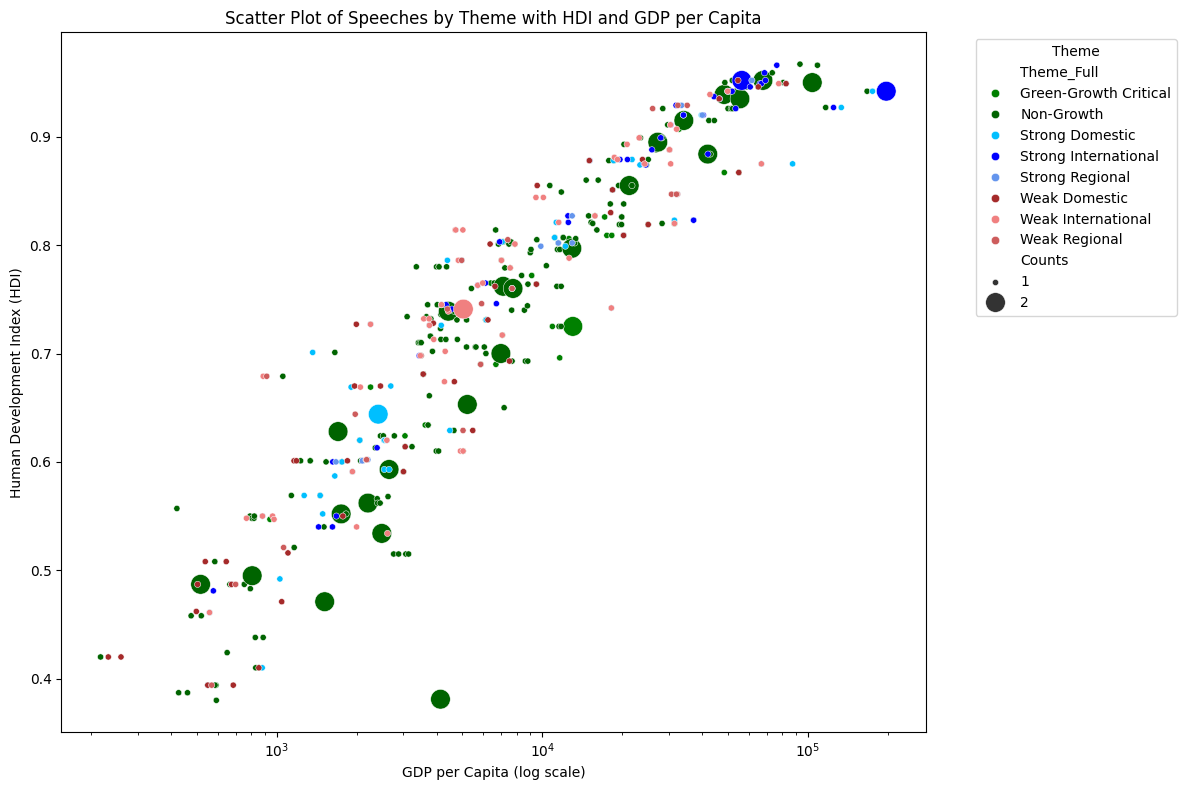

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Split the Theme_Combined column
df['Theme_Combined'] = df['Theme_Combined'].str.split()

# Explode the dataset so each theme has its own row
df_exploded = df.explode('Theme_Combined').reset_index(drop=True)

# Map the themes to their full names and assign similar colors to related themes
theme_mapping = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}

colors = {
    'Strong International': 'blue',
    'Strong Regional': 'cornflowerblue',
    'Strong Domestic': 'deepskyblue',
    'Weak International': 'lightcoral',
    'Weak Regional': 'indianred',
    'Weak Domestic': 'brown',
    'Green-Growth Critical': 'green',
    'Non-Growth': 'darkgreen'
}

df_exploded['Theme_Full'] = df_exploded['Theme_Combined'].map(theme_mapping)

# Aggregate data by theme, GDP_capita, and HDI to create bigger circles for overlapping points
agg_df = df_exploded.groupby(['Theme_Full', 'GDP_capita', 'HDI']).size().reset_index(name='Counts')

# Set up the plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=agg_df, 
                x='GDP_capita', 
                y='HDI', 
                size='Counts', 
                hue='Theme_Full', 
                palette=colors, 
                sizes=(20, 200),  # adjust point sizes as needed
                legend='full')

# Set the x-axis to a log scale
plt.xscale('log')

# Set plot labels and title
plt.xlabel('GDP per Capita (log scale)')
plt.ylabel('Human Development Index (HDI)')
plt.title('Scatter Plot of Speeches by Theme with HDI and GDP per Capita')

# Adjust the legend
plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


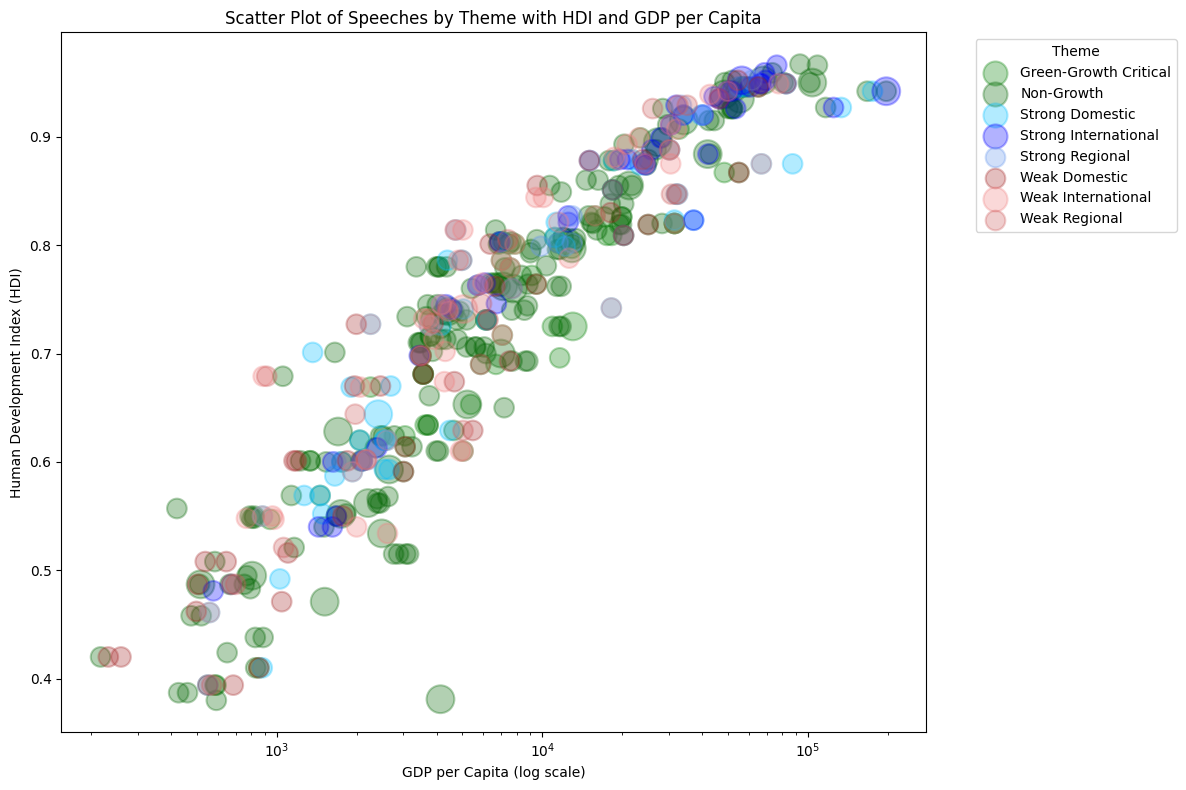

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Split the Theme_Combined column
df['Theme_Combined'] = df['Theme_Combined'].str.split()

# Explode the dataset so each theme has its own row
df_exploded = df.explode('Theme_Combined').reset_index(drop=True)

# Map the themes to their full names and assign similar colors to related themes
theme_mapping = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}

colors = {
    'Strong International': 'blue',
    'Strong Regional': 'cornflowerblue',
    'Strong Domestic': 'deepskyblue',
    'Weak International': 'lightcoral',
    'Weak Regional': 'indianred',
    'Weak Domestic': 'brown',
    'Green-Growth Critical': 'green',
    'Non-Growth': 'darkgreen'
}

df_exploded['Theme_Full'] = df_exploded['Theme_Combined'].map(theme_mapping)

# Aggregate data by theme, GDP_capita, and HDI to create bigger circles for overlapping points
agg_df = df_exploded.groupby(['Theme_Full', 'GDP_capita', 'HDI']).size().reset_index(name='Counts')

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot each theme separately to apply custom styling
for theme, group in agg_df.groupby('Theme_Full'):
    plt.scatter(
        group['GDP_capita'],
        group['HDI'],
        s=group['Counts'] * 200,  # Adjust point size as needed
        alpha=0.3,  # Transparency of the points
        edgecolor=colors[theme],
        linewidth=1.5,
        label=theme,
        color=colors[theme]
    )

# Set the x-axis to a log scale
plt.xscale('log')

# Set plot labels and title
plt.xlabel('GDP per Capita (log scale)')
plt.ylabel('Human Development Index (HDI)')
plt.title('Scatter Plot of Speeches by Theme with HDI and GDP per Capita')

# Adjust the legend
plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


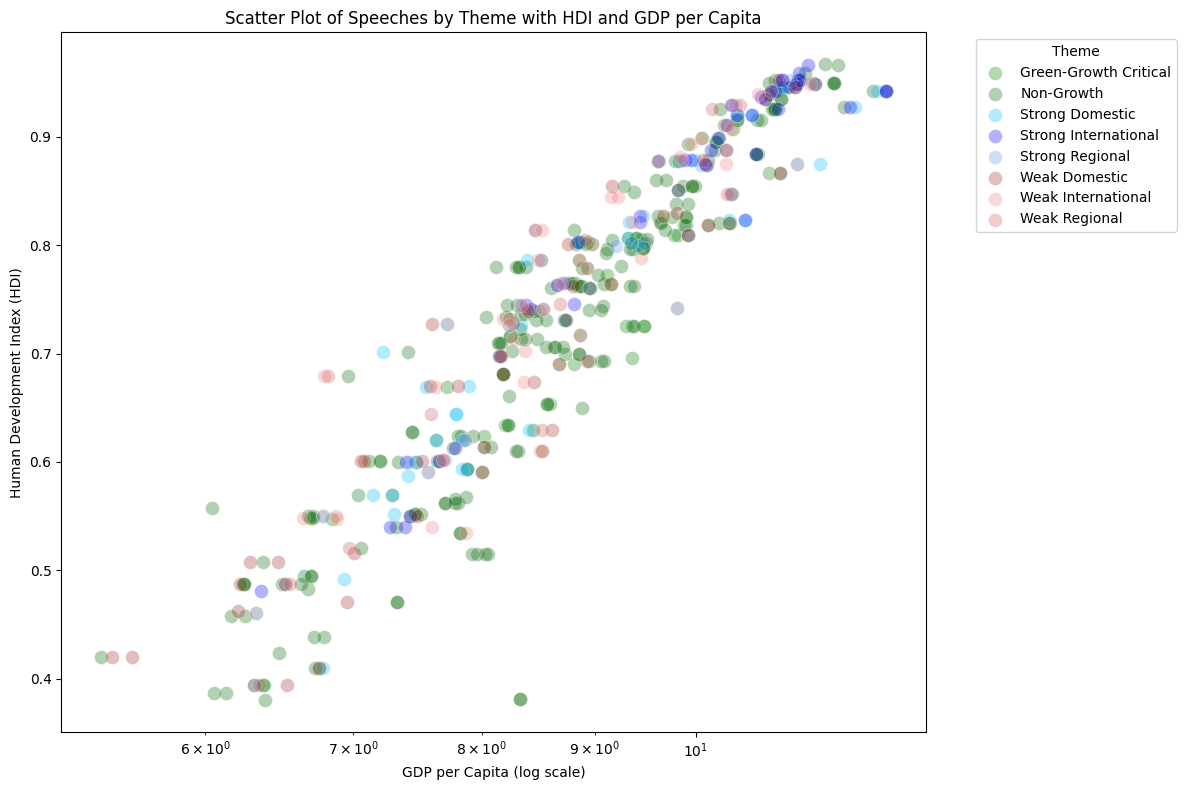

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Split the Theme_Combined column
df['Theme_Combined'] = df['Theme_Combined'].str.split()

# Explode the dataset so each theme has its own row
df_exploded = df.explode('Theme_Combined').reset_index(drop=True)

# Map the themes to their full names and assign similar colors to related themes
theme_mapping = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}

colors = {
    'Strong International': 'blue',
    'Strong Regional': 'cornflowerblue',
    'Strong Domestic': 'deepskyblue',
    'Weak International': 'lightcoral',
    'Weak Regional': 'indianred',
    'Weak Domestic': 'brown',
    'Green-Growth Critical': 'green',
    'Non-Growth': 'darkgreen'
}

df_exploded['Theme_Full'] = df_exploded['Theme_Combined'].map(theme_mapping)

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot each theme separately to apply custom styling
for theme, group in df_exploded.groupby('Theme_Full'):
    plt.scatter(
        np.log(group['GDP_capita']),
        group['HDI'],
        s=100,  # Increase point size for better visibility
        alpha=0.3,  # Transparency of the points for blending
        label=theme,
        color=colors[theme],
        edgecolor='w',  # White edge for better separation
        linewidth=0.5
    )

# Set the x-axis to a log scale
plt.xscale('log')

# Set plot labels and title
plt.xlabel('GDP per Capita (log scale)')
plt.ylabel('Human Development Index (HDI)')
plt.title('Scatter Plot of Speeches by Theme with HDI and GDP per Capita')

# Adjust the legend
plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


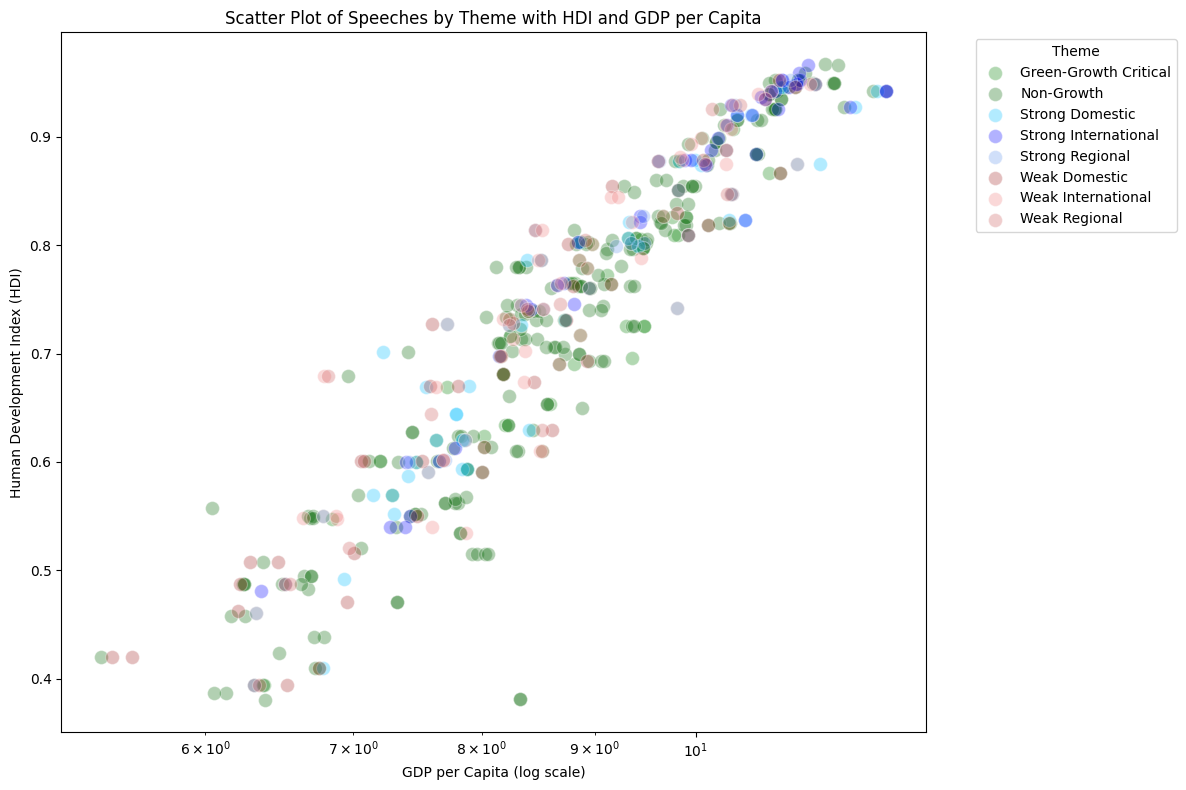

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Split the Theme_Combined column
df['Theme_Combined'] = df['Theme_Combined'].str.split()

# Explode the dataset so each theme has its own row
df_exploded = df.explode('Theme_Combined').reset_index(drop=True)

# Map the themes to their full names and assign similar colors to related themes
theme_mapping = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}

colors = {
    'Strong International': 'blue',
    'Strong Regional': 'cornflowerblue',
    'Strong Domestic': 'deepskyblue',
    'Weak International': 'lightcoral',
    'Weak Regional': 'indianred',
    'Weak Domestic': 'brown',
    'Green-Growth Critical': 'green',
    'Non-Growth': 'darkgreen'
}

df_exploded['Theme_Full'] = df_exploded['Theme_Combined'].map(theme_mapping)

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot each theme separately to apply custom styling
for theme, group in df_exploded.groupby('Theme_Full'):
    sns.scatterplot(
        x=np.log(group['GDP_capita']),
        y=group['HDI'],
        alpha=0.3,
        s=100,  # Increase point size for better visibility
        label=theme,
        color=colors[theme]
    )

# Set the x-axis to a log scale
plt.xscale('log')

# Set plot labels and title
plt.xlabel('GDP per Capita (log scale)')
plt.ylabel('Human Development Index (HDI)')
plt.title('Scatter Plot of Speeches by Theme with HDI and GDP per Capita')

# Adjust the legend
plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


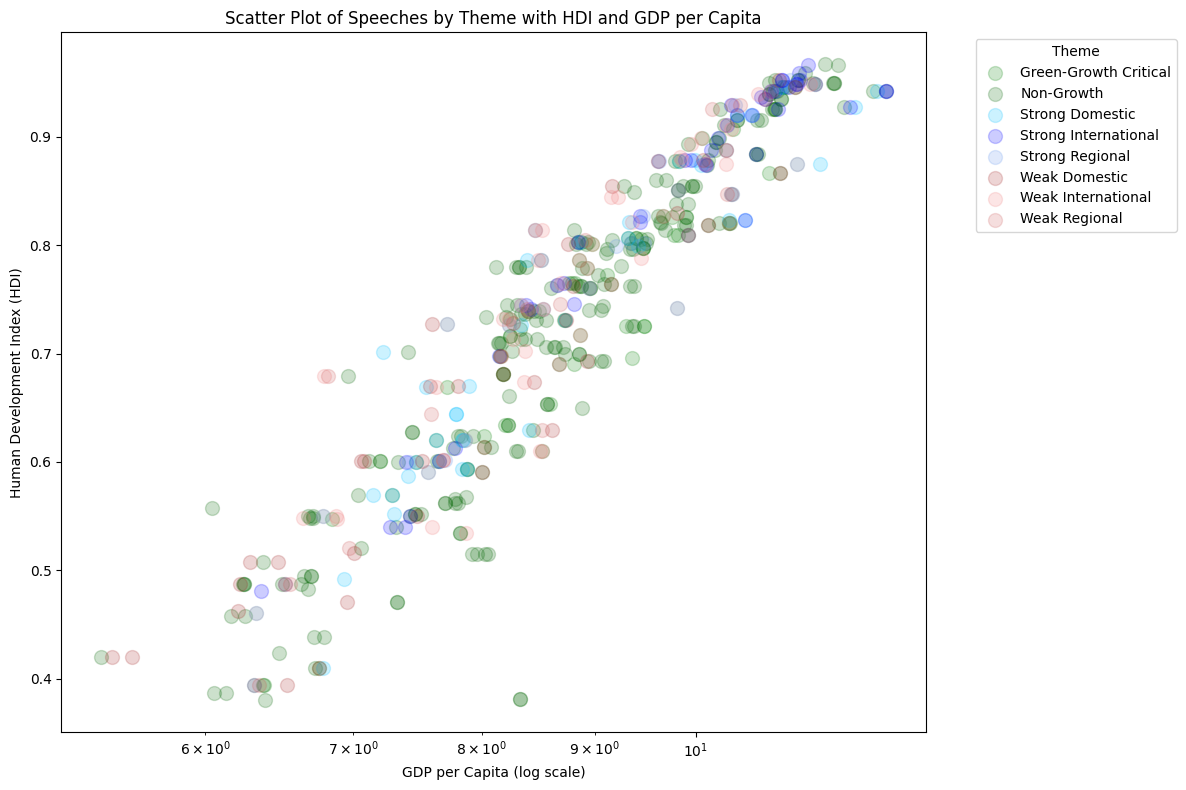

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Split the Theme_Combined column
df['Theme_Combined'] = df['Theme_Combined'].str.split()

# Explode the dataset so each theme has its own row
df_exploded = df.explode('Theme_Combined').reset_index(drop=True)

# Map the themes to their full names and assign similar colors to related themes
theme_mapping = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}

colors = {
    'Strong International': 'blue',
    'Strong Regional': 'cornflowerblue',
    'Strong Domestic': 'deepskyblue',
    'Weak International': 'lightcoral',
    'Weak Regional': 'indianred',
    'Weak Domestic': 'brown',
    'Green-Growth Critical': 'green',
    'Non-Growth': 'darkgreen'
}

df_exploded['Theme_Full'] = df_exploded['Theme_Combined'].map(theme_mapping)

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot each theme separately to apply custom styling
for theme, group in df_exploded.groupby('Theme_Full'):
    plt.scatter(
        np.log(group['GDP_capita']),
        group['HDI'],
        s=100,  # Increase point size for better visibility
        alpha=0.2,  # Transparency of the points for blending
        label=theme,
        color=colors[theme]
    )

# Set the x-axis to a log scale
plt.xscale('log')

# Set plot labels and title
plt.xlabel('GDP per Capita (log scale)')
plt.ylabel('Human Development Index (HDI)')
plt.title('Scatter Plot of Speeches by Theme with HDI and GDP per Capita')

# Adjust the legend
plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


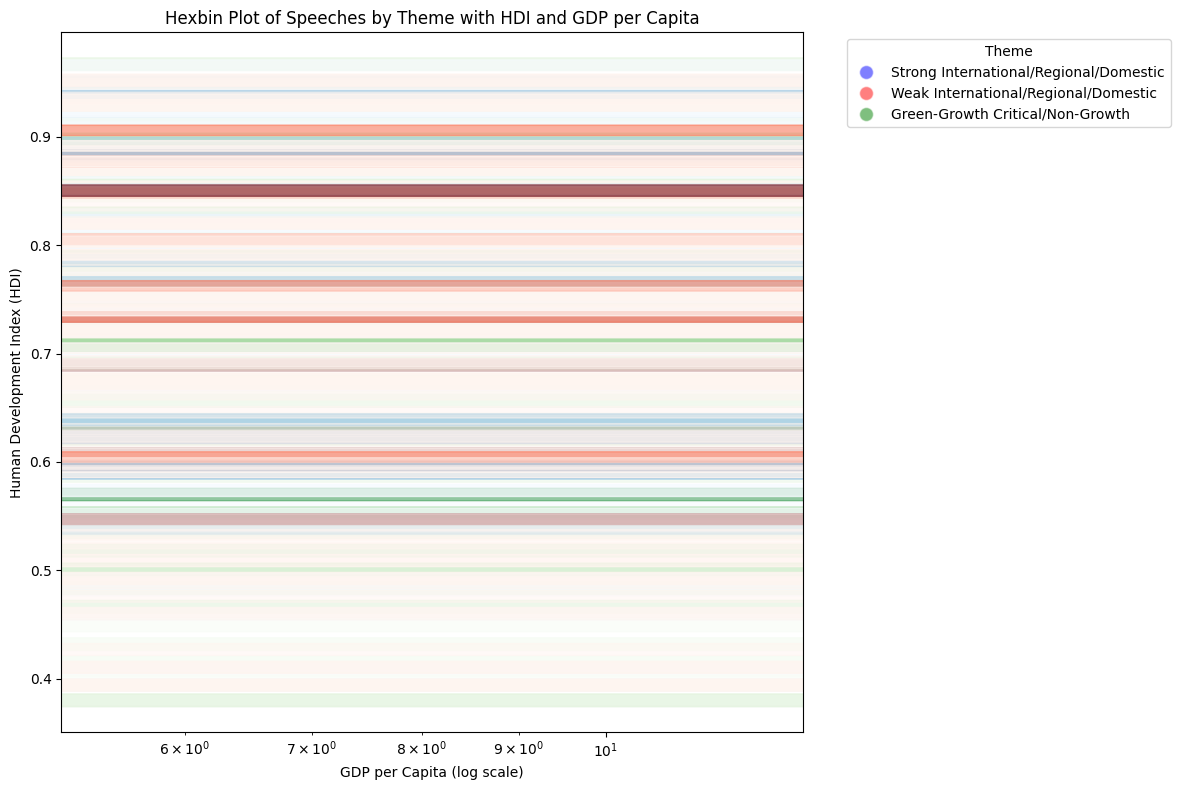

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Split the Theme_Combined column
df['Theme_Combined'] = df['Theme_Combined'].str.split()

# Explode the dataset so each theme has its own row
df_exploded = df.explode('Theme_Combined').reset_index(drop=True)

# Map the themes to their full names
theme_mapping = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}

df_exploded['Theme_Full'] = df_exploded['Theme_Combined'].map(theme_mapping)

# Set up the plot
plt.figure(figsize=(12, 8))

# Define a color map that blends colors
colors = {
    'Strong International': 'Blues',
    'Strong Regional': 'Blues',
    'Strong Domestic': 'Blues',
    'Weak International': 'Reds',
    'Weak Regional': 'Reds',
    'Weak Domestic': 'Reds',
    'Green-Growth Critical': 'Greens',
    'Non-Growth': 'Greens'
}

# Plot each theme separately using hexbin to apply custom styling
for theme, group in df_exploded.groupby('Theme_Full'):
    plt.hexbin(
        np.log(group['GDP_capita']),
        group['HDI'],
        gridsize=30,  # Adjust the size of the hexagons
        cmap=colors[theme],
        mincnt=1,  # Show hexagons with at least one count
        alpha=0.5  # Transparency of the hexagons for blending
    )

# Set the x-axis to a log scale
plt.xscale('log')

# Set plot labels and title
plt.xlabel('GDP per Capita (log scale)')
plt.ylabel('Human Development Index (HDI)')
plt.title('Hexbin Plot of Speeches by Theme with HDI and GDP per Capita')

# Manually create the legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, alpha=0.5, label='Strong International/Regional/Domestic'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, alpha=0.5, label='Weak International/Regional/Domestic'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, alpha=0.5, label='Green-Growth Critical/Non-Growth')
]
plt.legend(handles=handles, title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()
